In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head(10)

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

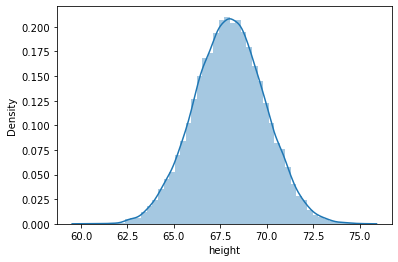

In [4]:
sns.distplot(df.height)

In [5]:
ht_std=df.height.std()
ht_std

1.901678771205604

In [6]:
ht_mean = df.height.mean()
ht_mean

67.99311359679979

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

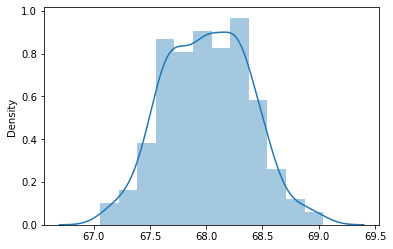

In [7]:
sample_means = []
n=25
for sample in range(0,300):
    sample_values = np.random.choice(a=df.height, size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
sns.distplot(sample_means)

In [8]:
mean_of_samples = np.mean(sample_means)
mean_of_samples

68.008028896

In [9]:
std_of_samples = np.std(sample_means)
std_of_samples

0.3750744357861273

In [10]:
std_err = ht_std/np.sqrt(n)
std_err

0.3803357542411208

In [28]:
%matplotlib inline
from scipy.stats import binom, norm
from math import sqrt

def bin(n,p,a,b,x1,x2):
    z=np.arange(a,b,1/20)
    x=np.arange(a,b,1)
    plt.figure(figsize=(8,4))
    plt.bar(range(a,b), binom.pmf(x,n,p), width=1, fill=False)
    plt.plot(z, norm.pdf(z,n*p,sqrt(n*p*(1-p))), color='b')
    plt.xticks(range(a,b), rotation=45)
    section = np.arange(x1,x2)
    plt.fill_between(section, binom.pmf(section,n,p), color='orange')
    plt.show()

In [29]:
# X ~Bin(100,0.5)
# X ~N(50,25)
# P(45<=X<55)
print("Using X~Bin(100),P")
print(binom.cdf(55,100,0.5)-binom.cdf(44,100,0.5))
print("Using X~N(50,25),P")
print(norm.cdf(55,50,5)-norm.cdf(45,50,5))
print("Applying continuity correction")
print(norm.cdf(55.5,50,5)-norm.cdf(44.5,50,5))

Using X~Bin(100),P
0.7287469759261658
Using X~N(50,25),P
0.6826894921370859
Applying continuity correction
0.7286678781072347


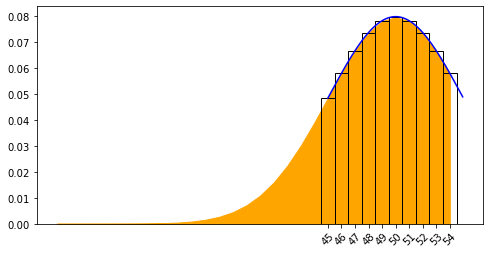

In [36]:
bin(100,0.5,45,55,25,55)

In [31]:
print(1-binom.cdf(59,100,0.5))
print(norm.sf(60,50,5))
print(norm.sf(59.5,50,5))

0.02844396682049044
0.022750131948179195
0.028716559816001803


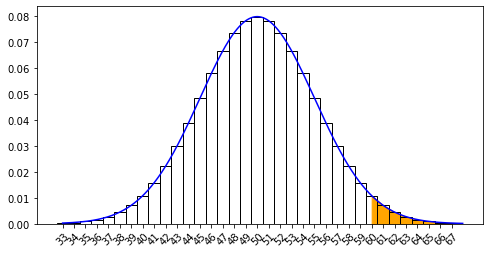

In [32]:
bin(100,0.5,33,68,60,68)